# Data Mining - Lab 03

* Full name: Đinh Anh Huy
* Student ID: 18110103

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
def find_missing_percent(data , showresult = True):
  total = data.isnull().sum().sort_values(ascending=False)
  percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
  miss_df = pd.concat([total, percent], axis=1, keys=['TotalMissingValues', 'PercentOfMissing'])
  
  miss_df = miss_df[miss_df["PercentOfMissing"] > 0.0]
  miss_df = miss_df.reset_index().rename(columns={'index': 'ColumnName'})
  if(showresult):
    print("* Check missing values:")
    print(">> Shape of data: ", data.shape)
    if miss_df.shape[0] == 0:
      print(">> There is no missing value in this data.")
    else:
      print(">> The table of percentage of missing values:")
      display(miss_df)
  return miss_df

In [3]:
# Read data
data = sns.load_dataset('diamonds')

print(">> Display the first 5 rows of data:")
display(data.head())
print(">> Shape of data: ", data.shape)
print("   * Number of rows: ", data.shape[0])
print("   * Number of columns: ", data.shape[1])

>> Display the first 5 rows of data:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


>> Shape of data:  (53940, 10)
   * Number of rows:  53940
   * Number of columns:  10


### Description of Diamonds Dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

#### Content
* **price**: price in US dollars (\$326--\$18,823)

* **carat**: weight of the diamond (0.2--5.01)

* **cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* **color**: diamond colour, from J (worst) to D (best)

* **clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* **x**: length in mm (0--10.74)

* **y**: width in mm (0--58.9)

* **z**: depth in mm (0--31.8)

* **depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* **table**: width of top of diamond relative to widest point (43--95)

In [4]:
data = data.rename(columns={'x': 'length', 'y': 'width', 'z': 'height'})
display(data.head())

,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.info()
numeric_cols = data.select_dtypes(['float','int']).columns
categoric_cols = data.select_dtypes('category').columns
print(f">> Numeric Columns   : {list(numeric_cols)}")
print(f">> Categoric Columns : {list(categoric_cols)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   length   53940 non-null  float64 
 8   width    53940 non-null  float64 
 9   height   53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
>> Numeric Columns   : ['carat', 'depth', 'table', 'price', 'length', 'width', 'height']
>> Categoric Columns : ['cut', 'color', 'clarity']


In [6]:
miss_df = find_missing_percent(data)

* Check missing values:
>> Shape of data:  (53940, 10)
>> There is no missing value in this data.


In [7]:
data.describe(include='all')

,carat,cut,color,clarity,depth,table,price,length,width,height
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


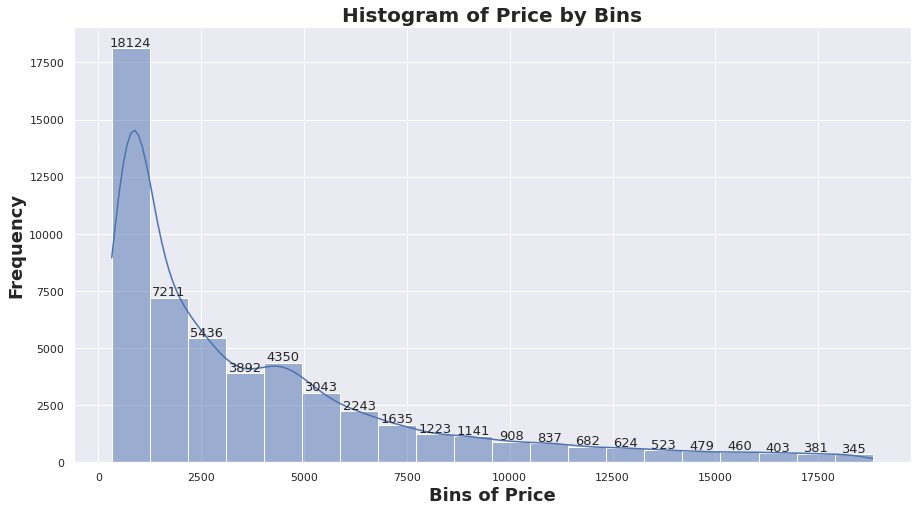

In [8]:
figure(figsize=(15, 8))
plt.title("Histogram of Price by Bins", size = 20, weight='bold')
ax = sns.histplot(x="price", data=data, alpha=0.5, bins=20, kde=True)
plt.xlabel("Bins of Price", size = 18, weight='bold')
plt.ylabel("Frequency", size = 18, weight='bold')

for p in ax.patches:
    count = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()+100
    ax.annotate(count, (x, y), ha='center', fontsize=13)

plt.show()

**Nhận xét:** 
Từ biểu đồ trên, ta thấy rằng 
* Phân phối của `price` bị lệch sang phải, tức là giá kim cương càng cao thì số lượng bán ra càng thấp. 
* Giá kim cương dao động từ khoảng 300 đến hơn 18000 dollars.
* Số lượng kim cương bán ra được nhiều nhất đến hơn 18000 viên với tầm giá trong khoảng 300 - 1000 dollars.

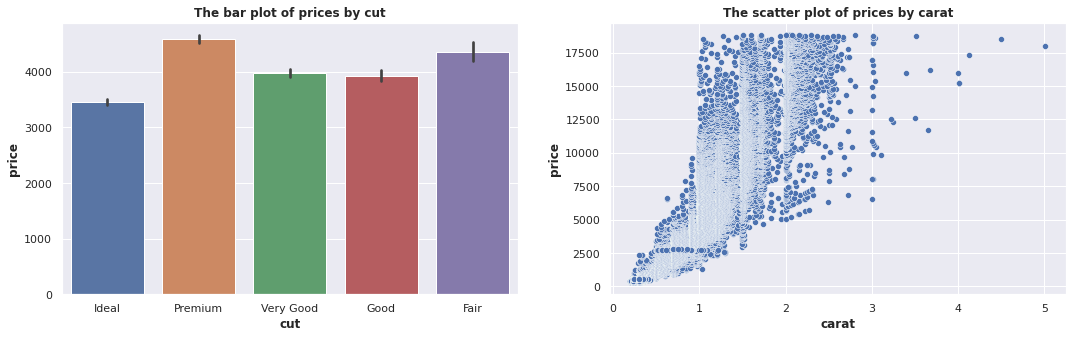

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(18,5))
sns.barplot(x='cut', y='price', data=data, ax=axs[0])
axs[0].set_title("The bar plot of prices by cut", weight='bold')
axs[0].set_xlabel('cut', weight='bold')
axs[0].set_ylabel('price', weight='bold')

sns.scatterplot(x='carat', y='price', data=data, ax=axs[1])
axs[1].set_title("The scatter plot of prices by carat", weight='bold')
axs[1].set_xlabel('carat', weight='bold')
axs[1].set_ylabel('price', weight='bold')

plt.show()

**Nhận xét:** 
* Trên lý thuyết, ta có thể hình dung được mối quan hệ giữa `price` và `cut` là mối quan hệ tuyến tính, tức là nếu chất lượng (`cut`) của viên kim cương càng tốt thì giá càng cao. Tuy nhiên, biểu đồ cột (bên trái) ở trên lại không thể hiện điều đó. Nguyên nhân mà ta có thể nghĩ đến là có các giá trị ngoại lai làm ảnh hưởng đến mối quan hệ được đề cập ở trên.
* Quan sát biểu đồ phân tán (bên phải), ta cũng thấy được có nhiều viên kim cương có số carat cao (từ 4 trở lên) so với mặt bằng chung (từ khoảng 3 carat đổ lại). Chứng tỏ các điểm này rất có thể là ngoại lai.

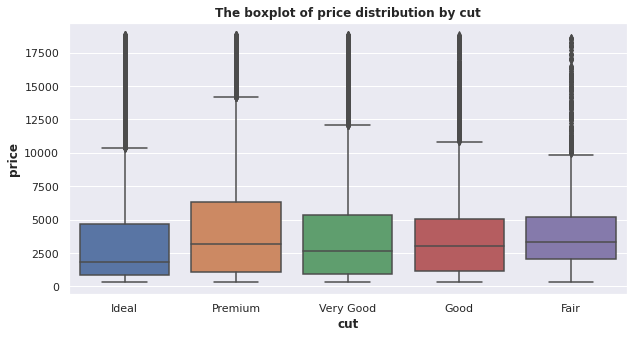

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cut', y='price', data=data)
plt.title('The boxplot of price distribution by cut', weight='bold')
plt.xlabel('cut', weight='bold')
plt.ylabel('price', weight='bold')
plt.show()

**Nhận xét:** Ta thấy rằng ở hầu hết các loại chất lượng (`cut`) khác nhau của kim cương, giá của kim cương có độ dao động lớn và có phần lớn tập trung ở mức giá thấp (khoảng $2500). Hơn nữa, có rất nhiều điểm ngoại lai xuất hiện ở tất cả các mức độ chất lượng của kim cương. Điều này cho thấy rằng, yếu tố ngoại lai có ảnh hưởng lớn khiến cho kiến thức trên lý thuyết không còn đúng ở một vài trường hợp.

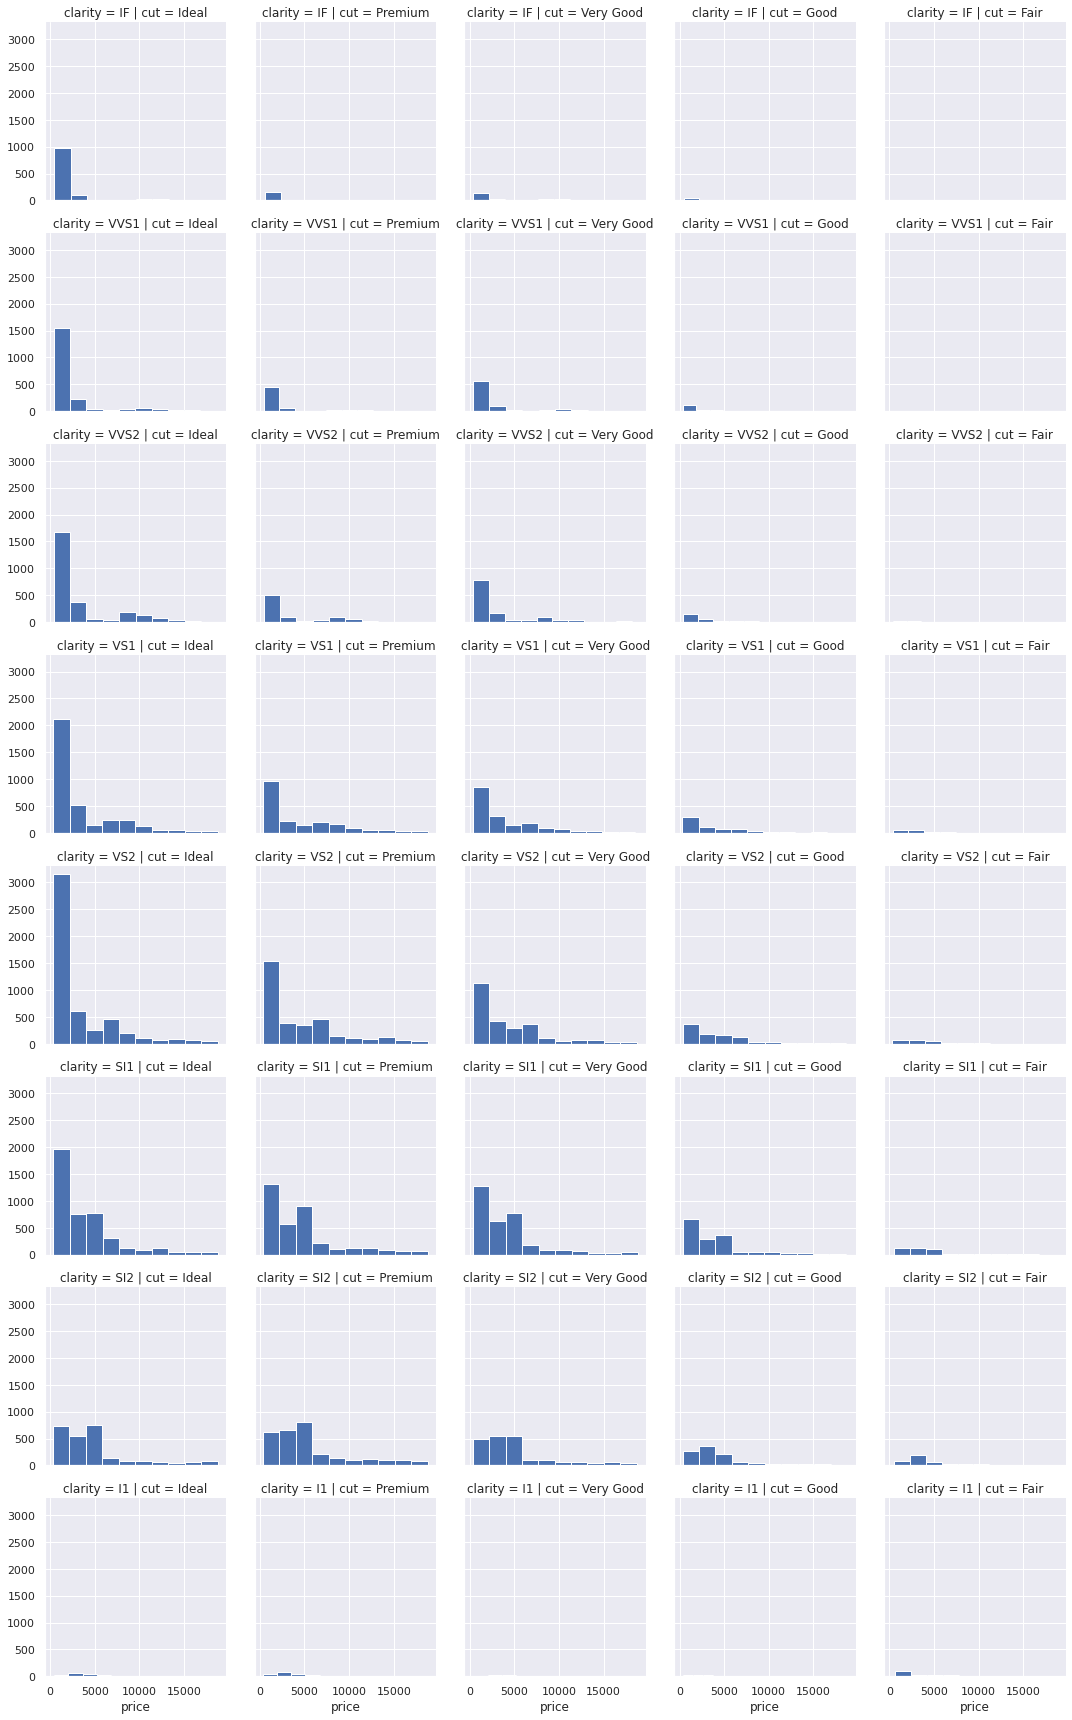

In [30]:
facets = sns.FacetGrid(col = "cut", row = "clarity", data = data)
facets.map(plt.hist, "price")

* Các biểu đồ trên cung cấp thông tin chi tiết về `price` theo `cut` và `clarity`. Phần lớn các viên kim cương rơi vào `cut = Ideal` và `clarity = VS2`.

* Có rất ít số lượng kim cương có `clarity` là `l1` và `cut = Good`. Hơn nữa, không có viên kim cương nào được bán ra có `clarity = IF` và `cut = Fair`. Điều này đáng ngạc nhiên vì kim cương có mức độ sạch cao nhất với chất lượng vết cắt vừa đáng lý ra phải được ưa chuộng hơn nhưng là không được bán ra. Điều này có thể chỉ ra rằng các viên kim cương loại này cực kỳ hiếm.

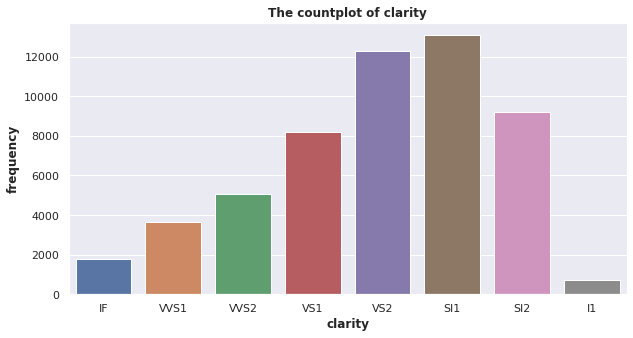

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x='clarity', data=data)
plt.title('The countplot of clarity', weight='bold')
plt.xlabel('clarity', weight='bold')
plt.ylabel('frequency', weight='bold')
plt.show()

**Nhận xét:** Từ biểu đồ trên, ta thấy rằng số lượng kim cương IF rất ít (dưới 2000 viên). Điều này có thể là do kỹ thuật khai thác chưa cao. Nó càng chứng minh được các viên kim cương loại này hiếm.

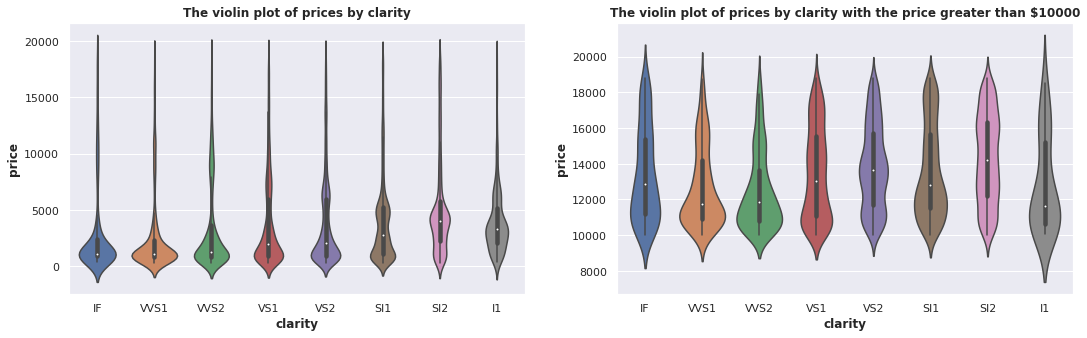

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(18,5))
sns.violinplot(x='clarity', y='price', data=data, ax=axs[0])
axs[0].set_title("The violin plot of prices by clarity", weight='bold')
axs[0].set_xlabel('clarity', weight='bold')
axs[0].set_ylabel('price', weight='bold')

sns.violinplot(x='clarity', y='price', data=data.query("price > 10000"), ax=axs[1])
axs[1].set_title("The violin plot of prices by clarity with the price greater than $10000", weight='bold')
axs[1].set_xlabel('clarity', weight='bold')
axs[1].set_ylabel('price', weight='bold')

plt.show()

**Nhận xét:**
* Từ biểu đồ bên trái, ta thấy rằng các viên kim cương IF có giá trung bình thấp hơn các cấp độ clarity còn lại.
* Tuy nhiên, khi ta phóng to vào các viên kim cương có giá trung bình cao trên $10000, giá trung bình của các viên kim cương IF cao hơn các loại còn lại.
* Những điều trên cho thấy rằng, giá của một viên kim cương phụ thuộc nhiều yếu tố hơn là độ tinh khiết của nó.

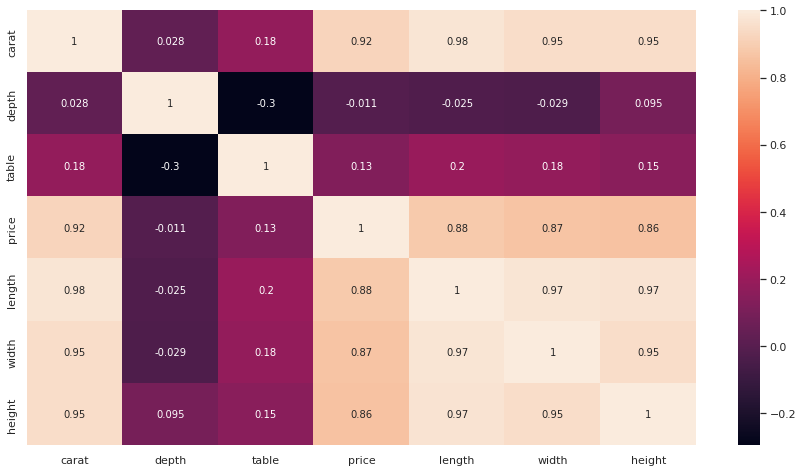

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Nhận xét:** Từ heatmap ở trên, ta thấy rằng giá của một viên kim cương bị ảnh hưởng nhiều bởi `carat` và các kích thước của nó.